In [97]:
%matplotlib  inline
import pandas  as pd
import numpy as np
import xgboost as xgb
#encoding:utf-8

import pandas as pd
import numpy as np
import matplotlib.pylab as plt

def get_relative_title():
    relative_title='''父、母、大姑、二姑、三姑、姑姑、二叔、三叔、大伯、二伯、姐姐、妹、第 、
    嫂 、姐夫、妹夫、大舅、二舅、老姨、二姨、大姨、岳父、女婿、外婆、小舅、
    媳妇、宝宝、宝贝儿、老婆 、亲爱、丈母娘、
    夫亲、郎君、夫君、良人、官人、相公、老公、爱人、卿卿、外子、外人、老头子、老伴、
    娘子、内人、良人、内子、老婆、爱人、卿卿、老婆子、老伴、
    爹、爹爹、爹亲、爹地、大大、老爸、爸比、爸、老爷子、
    娘娘、娘亲、娘妮、老妈、妈咪、妈、老娘、
    哥哥、兄长、兄台、兄亲、姊长、姊台、姊亲、
    弟、兄弟、弟子、弟亲、dad、mom、
    妹、姊妹、妹子、妹亲、妈、
    儿子、囝男、宝贝、孩子、女儿、闺女、囡女、丫头、宝贝、孩子、
    嫂子、兄嫂、兄妇、兄妻、老二、
    姐夫、姊兄、姊郎、姊丈、
    弟媳妇、兄弟媳妇、弟妹、弟妇、
    儿媳妇、半女、息妇、媳妇、三婶、大娘、二婶、
    爹、丈人、岳父、泰山、大大、老爸、爸、老爷子、
    娘、丈母娘、岳母、泰水、老妈、妈、老娘、
    爹、公公、公爹、大大、老爸、爸、老爷子、太上皇、
    娘、婆母娘、婆娘、老妈、妈、老娘、
    大舅哥、大舅子、小舅弟、小舅子、姑爷、老二、老三、
    妹、姊妹、妹子、小姨妹、小姨子、
    妹夫、妹弟、妹郎、小姑夫、表哥、大姐、大哥、二哥、三哥、三姐、二姐、大姐'''
    relative_title=set([ line.strip() for line in relative_title.split('、')  if len(line)>0])
    return relative_title


def is_relatives(word):
    relative_title=get_relative_title()
    spec_cond=('老婆' in word) or ('老公' in word) or ('母' in word) or ('宝贝' in word) or ('亲爱' in word) or (word =='姐') or (word =='哥')
    for rn in relative_title:
        if rn in word and len(word)<10:
            flag=1
            break
        elif  spec_cond:
            flag=1
            break
        else:
            flag=0
    return flag

def get_relative(pdSeris):
    relative_arr=np.array([is_relatives(name)  for name in pdSeris.values])
    return relative_arr
from sklearn.metrics import r2_score, auc,roc_auc_score,precision_score,accuracy_score,f1_score,recall_score,auc

In [106]:
#encoding:utf-8
#by yudang.wei
import  pandas as pd
# from utils import   *
import numpy as np
import xgboost as xgb

from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score, auc,roc_auc_score,precision_score,accuracy_score,f1_score,recall_score,auc

##1.数据清理
rel_data=pd.read_csv('../data/relatives_c2c.csv',index_col=0)
rel_data.drop(['custorm_id.1','number.1','custorm_id.2','number.2','custorm_id.3','number.3',],axis=1,inplace=True)
rel_data.fillna(0,inplace=True)

## 2.打标签
rel_data['is_rel']=get_relative(rel_data.name)
rel_df=rel_data[rel_data.is_rel==1]
unrel_df=rel_data[rel_data.is_rel==0]
rel_num=rel_df.shape[0]
unrel_num=unrel_df.shape[0]

##3. 采样：数据不平衡的情况下尽量使用重采样

## 下采样（Undersampling）:对非亲属数据欠采样，使得数据保持均衡
# sampler = np.random.permutation(unrel_num)[:rel_num*3]
# unrel_df=rel_data[rel_data.is_rel==0].take(sampler)

### 上采样（Oversampling）：对亲属数据重采样，保持数据均衡
sampler = np.random.randint(0,rel_num,size=unrel_num)
rel_df=rel_data[rel_data.is_rel==1].take(sampler)
rel_data=pd.concat([rel_df,unrel_df],axis=0)
rel_data.drop(['name','number'],axis=1,inplace=True)
### smote算法  python


## 4 测试集、训练集合分开
rel_feature=rel_data.ix[:,:-1]
target=rel_data.is_rel
X_train, X_test, y_train, y_test = train_test_split(rel_feature, target)

## 模型训练
model = xgb.XGBClassifier(n_estimators=150)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model = xgb.XGBClassifier()

##  参数调优化

print roc_auc_score(y_test, y_pred)
print precision_score(y_test,y_pred)
print accuracy_score(y_test,y_pred)
print f1_score(y_test,y_pred)
print recall_score(y_test,y_pred)

0.759527995394
0.750434027778
0.759448643842
0.761674008811
0.773255813953


In [83]:
rel_data=pd.read_csv('relatives_c2c.csv',index_col=0)
rel_data.drop(['custorm_id.1','number.1','custorm_id.2','number.2','custorm_id.3','number.3',],axis=1,inplace=True)
# target=get_relative(rel_data.name)
# rel_data.drop(['custorm_id.1','number.1','custorm_id.2','number.2','custorm_id.3','number.3','number','name'],axis=1,inplace=True)
rel_data.fillna(0,inplace=True)

In [84]:
rel_data['is_rel']=get_relative(rel_data.name)

In [85]:
rel_df=rel_data[rel_data.is_rel==1]
unrel_df=rel_data[rel_data.is_rel==0]
rel_num=rel_df.shape[0]
unrel_num=unrel_df.shape[0]

In [86]:
## 下采样（Undersampling）:对非亲属数据欠采样，使得数据保持均衡
# sampler = np.random.permutation(unrel_num)[:rel_num*3]
# unrel_df=rel_data[rel_data.is_rel==0].take(sampler)


### 上采样（Oversampling）：对亲属数据重采样，保持数据均衡
sampler = np.random.randint(0,rel_num,size=unrel_num)
rel_df=rel_data[rel_data.is_rel==1].take(sampler)
rel_data=pd.concat([rel_df,unrel_df],axis=0)

rel_data.drop(['name','number'],axis=1,inplace=True)
### smote算法  python

In [92]:
rel_feature=rel_data.ix[:,:-1]
target=rel_data.is_rel

In [142]:
X_train, X_test, y_train, y_test = train_test_split(rel_feature, target)
metrics=[]
for max_depth in [2, 5, 10]:
    for n_estimators in [100, 200, 300]:
        params = {'max_depth': max_depth, 'n_estimators': n_estimators}

        model = xgb.XGBClassifier(**params)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        metrics.append([(roc_auc_score(y_test, y_pred) ),precision_score(y_test,y_pred),accuracy_score(y_test,y_pred),\
      f1_score(y_test,y_pred),recall_score(y_test,y_pred)])
metrics_df=pd.DataFrame(np.array(metrics),columns=metrics_name)

array([[  0.00000000e+00,   1.10138527e-03,   4.67747120e-02, ...,
          7.46268657e-03,   9.87804878e-01,   1.82303246e-02],
       [  3.46534653e-02,   1.01464133e-02,   4.90040543e-02, ...,
          2.23880597e-02,   9.28355197e-01,   2.44800158e-02],
       [  9.90099010e-03,   4.72623084e-03,   6.21554456e-02, ...,
          5.97014925e-02,   0.00000000e+00,   2.59837706e-02],
       ..., 
       [  6.60066007e-03,   4.36348343e-04,   7.86120900e-03, ...,
          0.00000000e+00,   0.00000000e+00,   6.44730992e-03],
       [  4.12541254e-03,   5.28349499e-04,   1.24343569e-02, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  4.12541254e-02,   1.25410719e-02,   5.18888677e-02, ...,
          2.98507463e-02,   7.35294118e-01,   7.55891507e-03]])

In [158]:
X_train, X_test, y_train, y_test = train_test_split(rel_feature, target)
dtrain = xgb.DMatrix(X_train, y_train)
dvalid = xgb.DMatrix(X_test, y_test)
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
param = {'bst:max_depth':2, 'bst:eta':1, 'silent':1, 'objective':'binary:logistic' }
param['nthread'] = 4
plst = param.items()
plst += [('eval_metric', 'auc')] # Multiple evals can be handled in this way
plst += [('eval_metric', 'ams@0')]
num_round=30
# gbm = xgb.train(param, dtrain, num_boost_round=30, evals=watchlist, early_stopping_rounds=100, verbose_eval=True)
xlg=xgb.cv(param, dtrain, num_round, nfold=5,
       metrics={'auc'}, seed = 0,
       callbacks=[xgb.callback.print_evaluation(show_stdv=True)])

[0]	train-auc:0.74889+0.00960547	test-auc:0.707879+0.0111844
[1]	train-auc:0.804648+0.00677398	test-auc:0.754673+0.0107481
[2]	train-auc:0.83466+0.00414556	test-auc:0.779191+0.010286
[3]	train-auc:0.855066+0.00292937	test-auc:0.799891+0.010408
[4]	train-auc:0.871649+0.00290194	test-auc:0.815222+0.00924547
[5]	train-auc:0.888314+0.00329576	test-auc:0.830078+0.00880822
[6]	train-auc:0.900629+0.00478217	test-auc:0.842189+0.0106334
[7]	train-auc:0.908746+0.00433946	test-auc:0.849933+0.0091588
[8]	train-auc:0.917021+0.00527953	test-auc:0.856986+0.0110257
[9]	train-auc:0.926075+0.00669418	test-auc:0.866302+0.0114823
[10]	train-auc:0.932557+0.00562555	test-auc:0.872895+0.00975103
[11]	train-auc:0.939839+0.00633747	test-auc:0.880926+0.00982969
[12]	train-auc:0.946639+0.00493831	test-auc:0.888352+0.00684419
[13]	train-auc:0.952129+0.00230549	test-auc:0.894799+0.00398004
[14]	train-auc:0.955468+0.00337254	test-auc:0.898292+0.00448159
[15]	train-auc:0.958925+0.00238614	test-auc:0.902629+0.0057156

In [143]:
metrics_name=['auc','precison','accuracy','f1','recall']

In [159]:
xgb.

<module 'xgboost' from 'D:\ProgramsFile\Anaconda\lib\site-packages\xgboost-0.6-py2.7.egg\xgboost\__init__.pyc'>

In [165]:
pd.DataFrame(np.array(metrics),columns=metrics_name)

,auc,precison,accuracy,f1,recall
0,0.684329,0.695529,0.684304,0.675503,0.656597
1,0.723002,0.730399,0.722988,0.718863,0.707685
2,0.753006,0.756295,0.753001,0.751732,0.747223
3,0.883496,0.876910,0.883504,0.884632,0.892492
4,0.943733,0.925106,0.943753,0.945012,0.965793
5,0.965743,0.946360,0.965763,0.966522,0.987561
6,0.982870,0.970971,0.982881,0.983110,0.995558
7,0.988653,0.979094,0.988662,0.988784,0.998667
8,0.989098,0.979948,0.989106,0.989219,0.998667


In [124]:
r

(17990, 66)

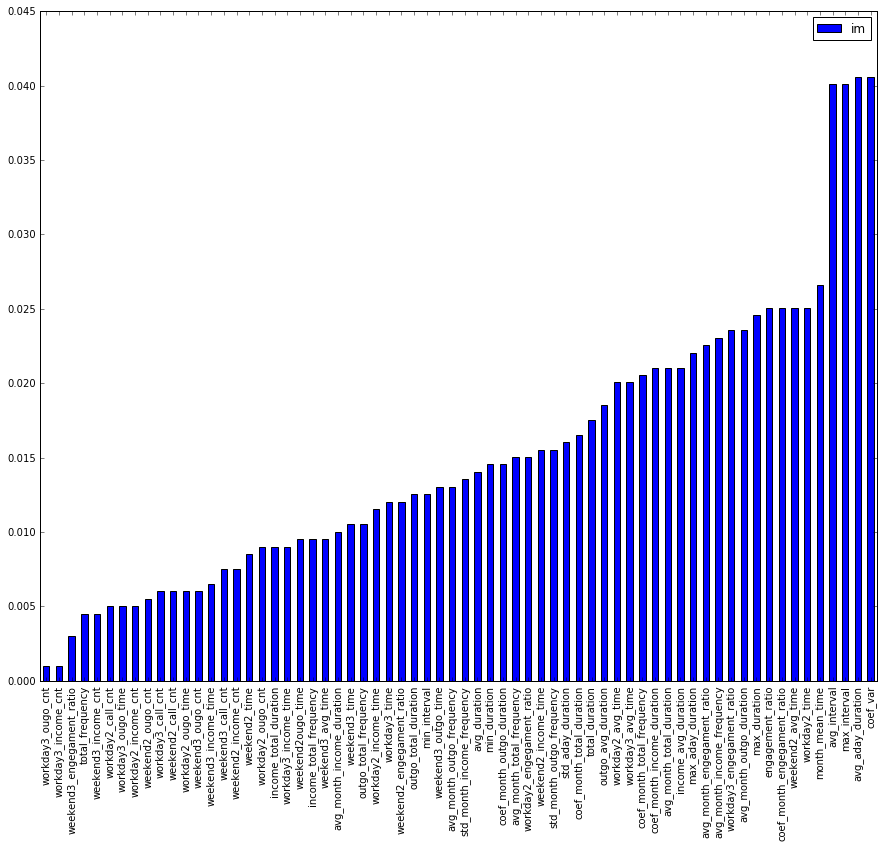

In [141]:
pd.DataFrame(model.feature_importances_,index=rel_feature.columns,columns=['im']).sort_values('im').plot.bar(figsize=(15,12),rot=90)

In [104]:
print( roc_auc_score(y_test, y_pred) )
print precision_score(y_test,y_pred)
print accuracy_score(y_test,y_pred)
print f1_score(y_test,y_pred)
print recall_score(y_test,y_pred)


0.819007535539
0.806310254163
0.818808359271
0.818687430478
0.831450519657


(2500, 66)